In [1]:
import os
print("Current working directory:", os.getcwd())

Current working directory: D:\mcdonalds_analytics_project\notebook


In [19]:
import pandas as pd
menu = pd.read_csv("../data/nutrition/menu.csv")   # adjust filename
stores = pd.read_csv("../data/stores/stores.csv")
#reviews = pd.read_csv("../data/reviews/reviews.csv")
reviews = pd.read_csv("../data/reviews/reviews.csv", encoding="latin1")
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [21]:
stores.rename(columns={"address": "store_address"}, inplace=True)
stores.head()

,name,storeid,country,subdivision,city,store_address,postcode,telephone,runhours,latitude,longitude,services
0,McDonald's,nodata,Andorra,Andorra la Vella,Andorra la Vella,"Av. Meritxell, 32 AD500 Andorra la Vella",AD500,885 885,8:00-23:00,42.507875,1.524985,Terrace/Accessibility/Birthday/McCafé/Breakfast
1,McDonald's - Pas de la Casa,nodata,Andorra,Encamp,El Pas de la Casa,"Plaça dels Coprínceps, 23 AD200 Pas de la Casa",AD200,880 512,9:00-21:00,42.543500,1.732089,McDrive/Accessibility/Breakfast/Dessert/Birthd...
2,McDonald's - Av. Tarragona,nodata,Andorra,Andorra la Vella,Andorra la Vella,"Av. of Tarragona, 49 AD500 Andorra la Vella",AD500,800 400,11:00-24:00/11:00-01:00,42.505142,1.527843,McDelivery/Terrace/McDrive/Accessibility/McCaf...
3,McDonald's - Epizen,nodata,Andorra,Sant Julià de Lòria,Sant Julià de Lòria,Carretera General CG1 - Epizen Shopping Center...,AD600,742 400,09:00-22:00,42.459812,1.489049,McDelivery/Terrace/McDrive/Accessibility/Pakri...
4,McDonald's Andorra - Meritxell,nodata,Andorra,Andorra la Vella,Andorra la Vella,"Av. Meritxell, 105 AD500 Andorra la Vella",AD500,726 396,11:00-23:00,42.508503,1.533468,McDrive/TakeAway/McCafé/Breakfast/Accessibility


In [8]:
reviews.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


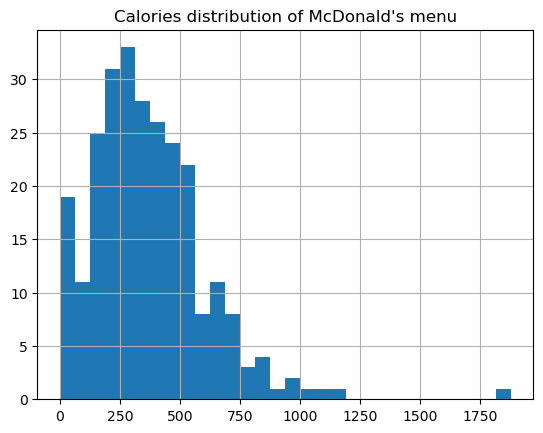

TypeError: no numeric data to plot

In [22]:
import matplotlib.pyplot as plt
# distribution of calories
menu['Calories'].hist(bins=30)
plt.title('Calories distribution of McDonald\'s menu')
plt.show()

# top 10 highest-calorie items
menu.sort_values('Calories', ascending=False).head(10)[['Item','Calories']]

# avg rating by city
city_ratings = reviews.merge(stores, on='storeid').groupby('city')['rating'].mean().sort_values()
city_ratings.plot.barh()
plt.title('Average rating by city')
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = menu[['Calories','Total Fat','Sugars','Protein']].dropna()
X = StandardScaler().fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
menu['nutrient_cluster'] = kmeans.labels_

C:\Users\singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [26]:
from scipy.stats import ttest_ind
burgers = menu[menu['Category']=='Burgers']['Calories'].dropna()
salads  = menu[menu['Category']=='Salads']['Calories'].dropna()
ttest_ind(burgers, salads, equal_var=False)

C:\Users\singh\anaconda3\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))